### Codio Activity 21.5: Implementing Random Forests

**Expected Time = 60 minutes** 

**Total Points = 30** 

This activity focuses on building models using the `RandomForestClassifier` from scikit-learn.  You will explore the estimator, and how the number of trees in the model affect the performance. To evaluate your model you will look to the out of bag data rather than a test set. 

#### Index

- [Problem 1](#-Problem-1)
- [Problem 2](#-Problem-2)
- [Problem 3](#-Problem-3)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/fetal.zip', compression = 'zip')

In [3]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [4]:
X, y = df.drop('fetal_health', axis = 1), df['fetal_health']

[Back to top](#-Index)

### Problem 1

#### Buildilng the Model

**10 Points**

Below, create an instance of the `RandomForestClassifier` named `forest_1` below using setting the parameters:

- `random_state = 42`
- `oob_score = True`

Assign the oob score to `score`



In [5]:
### GRADED
forest_1 = ''
score =''

# YOUR CODE HERE
#raise NotImplementedError()
forest_1 = RandomForestClassifier(random_state = 42, oob_score = True).fit(X, y)
score = forest_1.oob_score_

### ANSWER CHECK
print(score)

0.9444967074317968


[Back to top](#-Index)

### Problem 2

#### Changing the number of trees

**10 Points**

Now, compare forests with different numbers of trees given in `n_trees` below. Iterate over these values and keep track of the out of bag score with the list `oob_scores`.  Again, be sure to set `random_state = 42` and `oob_score = True`.



In [6]:
n_trees = [1, 10, 100, 500, 1000, 2000]

In [7]:
### GRADED
oob_scores = []
for i in n_trees:
    pass
    
# YOUR CODE HERE
#raise NotImplementedError()
oob_scores = []
for i in n_trees:
    forest_1 = RandomForestClassifier(random_state = 42, oob_score = True, n_estimators = i).fit(X, y)
    score = forest_1.oob_score_
    oob_scores.append(score)
    
### ANSWER CHECK
print(oob_scores)

[0.8287864534336783, 0.9158043273753528, 0.9444967074317968, 0.944967074317968, 0.9468485418626529, 0.9468485418626529]


Text(0, 0.5, 'oob score')

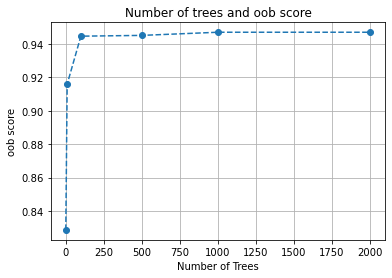

In [8]:
plt.plot(n_trees, oob_scores, '--o')
plt.grid()
plt.title('Number of trees and oob score')
plt.xlabel('Number of Trees')
plt.ylabel("oob score")

[Back to top](#-Index)

### Problem 3

#### Changing the trees themselves

**10 Points**

The `RandomForestClassifier` contains most of the same parameters as the `DecisionTreeClassifier` including `max_depth` and `ccp_alpha` that control the geometry of the individual trees.  

While searching over many parameters of a forest might seem like a good idea, in this context it is too computationally complex to be exhaustive.  

Below, compare trees with 200 trees in the model, and explore if the depth of these trees effects the out of bag score.  Use the list `depths` below, and use the list `depth_oob` to keep track of the scores.



In [9]:
depths = [1, 2, 3, 4, 5, None]

In [10]:
### GRADED
depth_oobs = []
for d in depths:
    pass
    
# YOUR CODE HERE
#raise NotImplementedError()
depth_oobs = []
for d in depths:
    forest_1 = RandomForestClassifier(random_state = 42, oob_score = True, max_depth = d, n_estimators=200,).fit(X, y)
    score = forest_1.oob_score_
    depth_oobs.append(score)
### ANSWER CHECK
print(depth_oobs)

[0.7784571966133584, 0.8598306679209784, 0.8955785512699906, 0.9059266227657573, 0.9158043273753528, 0.9468485418626529]


The Random Forest estimator is a powerful example of ensembling.  From situation to situation it is important to recall that there is no one model that will always do better.  In the next activities, you will see two more ensembling techniques that will be important options to consider in your work.